In [1]:
import pandas as pd
import numpy as np
from pathlib import PurePosixPath, PureWindowsPath
from matplotlib import pyplot as plt

In [2]:
# IN-HOUSE FUNCTION: RETURN DIRECTORY SPECIFIC TO RUNNING OS
def get_directory(path):
    if os.name == 'posix':
        return str(PurePosixPath(path))
    else:
        return str(PureWindowsPath(path))

In [3]:
# VARIABLES
HARGAPANGAN_LOCATION = get_directory('./dataset/time-series')

# TEST
print(HARGAPANGAN_LOCATION)

dataset\time-series


For the following code block, we are getting all the data from four excel files (trust me, the data is spread horizontally and I don't wanna mess too much)

In [4]:
_hp_20_21 = pd.read_excel(get_directory(HARGAPANGAN_LOCATION + '/Harga Pangan - 2020 to 2021.xlsx'), skiprows=8).transpose().drop('No.')
_hp_20_21.columns = _hp_20_21.iloc[0]
_hp_20_21 = _hp_20_21.drop(_hp_20_21.index[0])
_hp_19_20 = pd.read_excel(get_directory(HARGAPANGAN_LOCATION + '/Harga Pangan - 2019 to 2020.xlsx'), skiprows=8).transpose().drop('No.')
_hp_19_20.columns = _hp_19_20.iloc[0]
_hp_19_20 = _hp_19_20.drop(_hp_19_20.index[0])
_hp_18_19 = pd.read_excel(get_directory(HARGAPANGAN_LOCATION + '/Harga Pangan - 2018 to 2019.xlsx'), skiprows=8).transpose().drop('No.')
_hp_18_19.columns = _hp_18_19.iloc[0]
_hp_18_19 = _hp_18_19.drop(_hp_18_19.index[0])
_hp_17_18 = pd.read_excel(get_directory(HARGAPANGAN_LOCATION + '/Harga Pangan - 2017 to 2018.xlsx'), skiprows=8).transpose().drop('No.')
_hp_17_18.columns = _hp_17_18.iloc[0]
_hp_17_18 = _hp_17_18.drop(_hp_17_18.index[0])
#_hp_20_21 = pd.read_excel(get_directory(HARGAPANGAN_LOCATION + '/Harga Pangan - 2020 to 2021.xlsx'), skiprows=8).transpose().drop('No.')

In [5]:
_hp_17_18

Komoditas(Rp),Beras,Beras Kualitas Bawah I (kg),Beras Kualitas Bawah II (kg),Beras Kualitas Medium I (kg),Beras Kualitas Medium II (kg),Beras Kualitas Super I (kg),Beras Kualitas Super II (kg),Daging Ayam,Daging Ayam Ras Segar (kg),Daging Sapi,...,Cabai Rawit,Cabai Rawit Hijau (kg),Cabai Rawit Merah (kg),Minyak Goreng,Minyak Goreng Curah (kg),Minyak Goreng Kemasan Bermerk 1 (kg),Minyak Goreng Kemasan Bermerk 2 (kg),Gula Pasir,Gula Pasir Kualitas Premium (kg),Gula Pasir Lokal (kg)
31/07/2017,10900,9950,9450,11000,10850,12450,11850,32500,32500,115350,...,35700,29300,44300,13650,11750,14750,14150,14600,16400,13050
01/08/2017,10950,9900,9450,11050,10850,12450,11850,32650,32650,115000,...,35950,29950,44150,13650,11750,14750,14150,14600,16400,13050
02/08/2017,10950,9900,9450,11000,10800,12450,11850,32650,32650,114950,...,35600,29850,43400,13650,11750,14750,14150,14600,16450,13050
03/08/2017,10950,9900,9450,11050,10850,12450,11850,32800,32800,115100,...,35700,30100,43250,13650,11750,14750,14150,14600,16400,13050
04/08/2017,11000,9900,9750,11050,10850,12450,11850,32950,32950,114850,...,35600,30050,43200,13650,11750,14750,14150,14600,16400,13050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
04/05/2018,11500,10450,10050,11650,11400,12900,12450,33850,33850,115100,...,31900,29300,35300,13350,11650,14450,13800,13700,15350,12350
07/05/2018,11500,10450,10050,11650,11400,12900,12450,34350,34350,114850,...,31550,29500,34350,13400,11650,14450,13800,13700,15350,12350
08/05/2018,11500,10450,10050,11650,11400,12900,12450,34550,34550,115250,...,31450,29300,34250,13400,11650,14450,13800,13700,15350,12350
09/05/2018,11500,10450,10050,11650,11400,12900,12450,34700,34700,115300,...,31550,29250,34500,13400,11650,14450,13800,13700,15350,12350


In [6]:
# Creating the master dataset
HARGA_PANGAN = pd.concat([_hp_17_18, _hp_18_19, _hp_19_20, _hp_20_21], ignore_index=False).dropna()

In [7]:
HARGA_PANGAN_BERAS = np.delete(HARGA_PANGAN['Beras'].values, 0).astype(int)

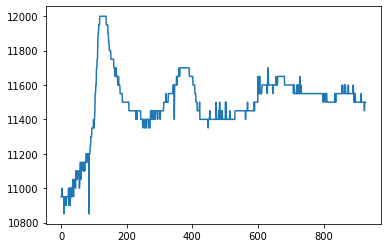

In [9]:
# Here is the time series for the average rice value in Indonesia

plt.plot(range(len(HARGA_PANGAN_BERAS)), HARGA_PANGAN_BERAS)
plt.show()